# Clasificador de bosque aleatorio

In [1]:
from sklearn.ensemble import RandomForestClassifier


In [2]:
import pickle
with open("prestamo.pkl", "rb") as f:
    X_prestamo_entrenamiento, y_prestamo_entrenamiento, X_prestamo_prueba, y_prestamo_prueba = pickle.load(f)

In [3]:
X_prestamo_entrenamiento.shape, y_prestamo_entrenamiento.shape

((2968, 13), (2968,))

In [4]:
X_prestamo_prueba.shape, y_prestamo_prueba.shape

((1273, 13), (1273,))

## Modelo de entrenamiento 

In [5]:
random_forest_prestamo = RandomForestClassifier(n_estimators=50, criterion="entropy",random_state=0)
random_forest_prestamo.fit(X_prestamo_entrenamiento,y_prestamo_entrenamiento)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

## Modelo de prueba

In [6]:
prevision = random_forest_prestamo.predict(X_prestamo_prueba)

In [7]:
prevision

array(['Approved', 'Approved', 'Approved', ..., 'Approved', 'Approved',
       'Rejected'], dtype=object)

In [8]:
y_prestamo_prueba

array(['Approved', 'Approved', 'Approved', ..., 'Approved', 'Approved',
       'Rejected'], dtype=object)

In [9]:
random_forest_prestamo.feature_importances_

array([0.00182057, 0.00184742, 0.0022873 , 0.00206192, 0.00908421,
       0.02082399, 0.03314456, 0.074827  , 0.77813951, 0.01729085,
       0.01973354, 0.0201714 , 0.01876773])

## Comparar el modelo de prueba con el modelo original
##### 0 - Approved       1 - Rejected

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

### Puntuación de precisión

In [11]:
accuracy_score(prevision,y_prestamo_prueba)

0.98114689709348

In [12]:
confusion_matrix(prevision,y_prestamo_prueba)

array([[780,  17],
       [  7, 469]], dtype=int64)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

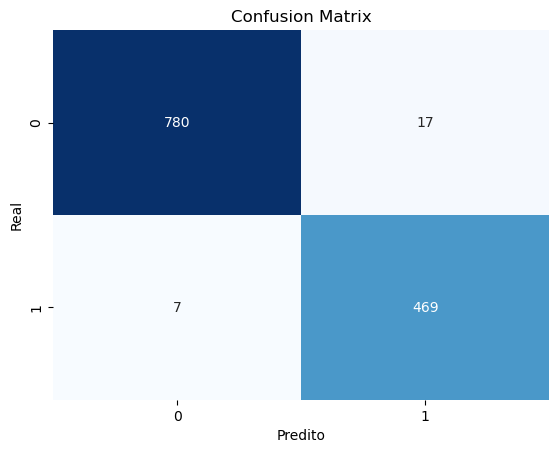

In [14]:
cm = confusion_matrix(prevision,y_prestamo_prueba)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

In [15]:
from yellowbrick.classifier import ConfusionMatrix

0.98114689709348

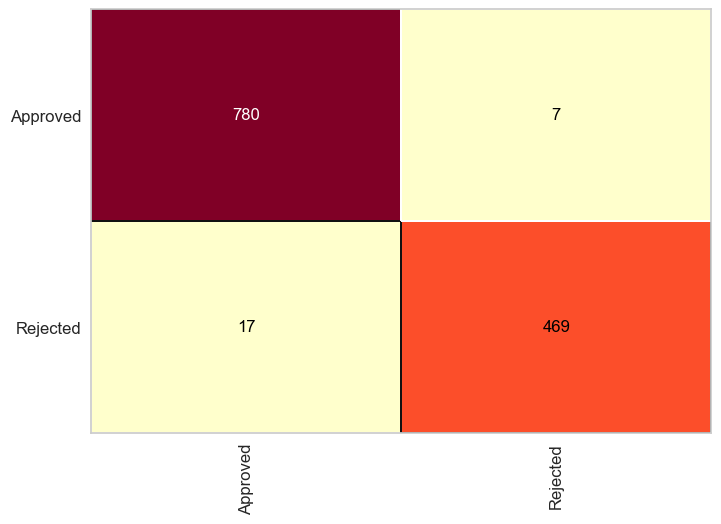

In [16]:
cm = ConfusionMatrix(random_forest_prestamo)
cm.fit(X_prestamo_entrenamiento,y_prestamo_entrenamiento)
cm.score(X_prestamo_prueba,y_prestamo_prueba)

In [17]:
print(classification_report(y_prestamo_prueba,prevision))

              precision    recall  f1-score   support

    Approved       0.98      0.99      0.98       787
    Rejected       0.99      0.97      0.98       486

    accuracy                           0.98      1273
   macro avg       0.98      0.98      0.98      1273
weighted avg       0.98      0.98      0.98      1273

